<a href="https://colab.research.google.com/github/vendo495/projects/blob/main/Retail_analysis_walmart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
walmart_data = pd.read_csv('/content/Walmart_Store_sales.csv')

# Display the first few rows of the dataset to get an overview
walmart_data.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [ ]:
# Grouping by store and summing up the weekly sales to get total sales for each store
store_sales_sum = walmart_data.groupby('Store')['Weekly_Sales'].sum()

# Store with maximum sales
store_max_sales = store_sales_sum.idxmax()
max_sales_value = store_sales_sum.max()

store_max_sales, max_sales_value


(20, 301397792.46)

In [ ]:
# Grouping by store and calculating standard deviation of weekly sales
store_sales_std = walmart_data.groupby('Store')['Weekly_Sales'].std()

# Store with maximum standard deviation
store_max_std = store_sales_std.idxmax()
max_std_value = store_sales_std.max()

# Coefficient of mean to standard deviation for the store with max standard deviation
store_mean = walmart_data[walmart_data['Store'] == store_max_std]['Weekly_Sales'].mean()
coefficient = store_mean / max_std_value

store_max_std, max_std_value, coefficient


(14, 317569.9494755081, 6.363884253900052)

In [ ]:
# Convert the 'Date' column to datetime format
walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])

<ipython-input-5-50b8893ca238>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  walmart_data['Date'] = pd.to_datetime(walmart_data['Date'])


In [ ]:
# Filter data for Q2 and Q3 of 2012
q2_2012_data = walmart_data[(walmart_data['Date'] >= '2012-04-01') & (walmart_data['Date'] <= '2012-06-30')]
q3_2012_data = walmart_data[(walmart_data['Date'] >= '2012-07-01') & (walmart_data['Date'] <= '2012-09-30')]


In [ ]:
# Calculate sales for each store in Q2 and Q3
q2_sales = q2_2012_data.groupby('Store')['Weekly_Sales'].sum()
q3_sales = q3_2012_data.groupby('Store')['Weekly_Sales'].sum()


In [ ]:
# Calculate growth rate for each store
growth_rate = ((q3_sales - q2_sales) / q2_sales) * 100


In [ ]:
# Store(s) with the highest growth rate
store_max_growth = growth_rate.idxmax()
max_growth_value = growth_rate.max()


In [ ]:
store_max_growth, max_growth_value

(16, -2.7892938117467203)

In [ ]:
# Calculate the mean sales for non-holiday weeks
mean_non_holiday_sales = walmart_data[walmart_data['Holiday_Flag'] == 0]['Weekly_Sales'].mean()


In [ ]:
# Filter data for holiday weeks
holiday_sales_data = walmart_data[walmart_data['Holiday_Flag'] == 1]


In [ ]:
# Group by date to get total sales for each holiday across all stores
total_holiday_sales = holiday_sales_data.groupby('Date')['Weekly_Sales'].sum()


In [ ]:
# Holidays with higher sales than mean non-holiday sales
holidays_higher_sales = total_holiday_sales[total_holiday_sales > mean_non_holiday_sales]
holidays_higher_sales


Date
2010-10-09    45634397.84
2010-11-26    65821003.24
2010-12-02    48336677.63
2010-12-31    40432519.00
2011-09-09    46763227.53
2011-11-02    47336192.79
2011-11-25    66593605.26
2011-12-30    46042461.04
2012-07-09    48330059.31
2012-10-02    50009407.92
Name: Weekly_Sales, dtype: float64

In [ ]:
import matplotlib.pyplot as plt

# Extracting month and year from the Date column
walmart_data['Year'] = walmart_data['Date'].dt.year
walmart_data['Month'] = walmart_data['Date'].dt.month

In [ ]:
# Grouping by year and month to get total sales for each month
monthly_sales = walmart_data.groupby(['Year', 'Month'])['Weekly_Sales'].sum().reset_index()


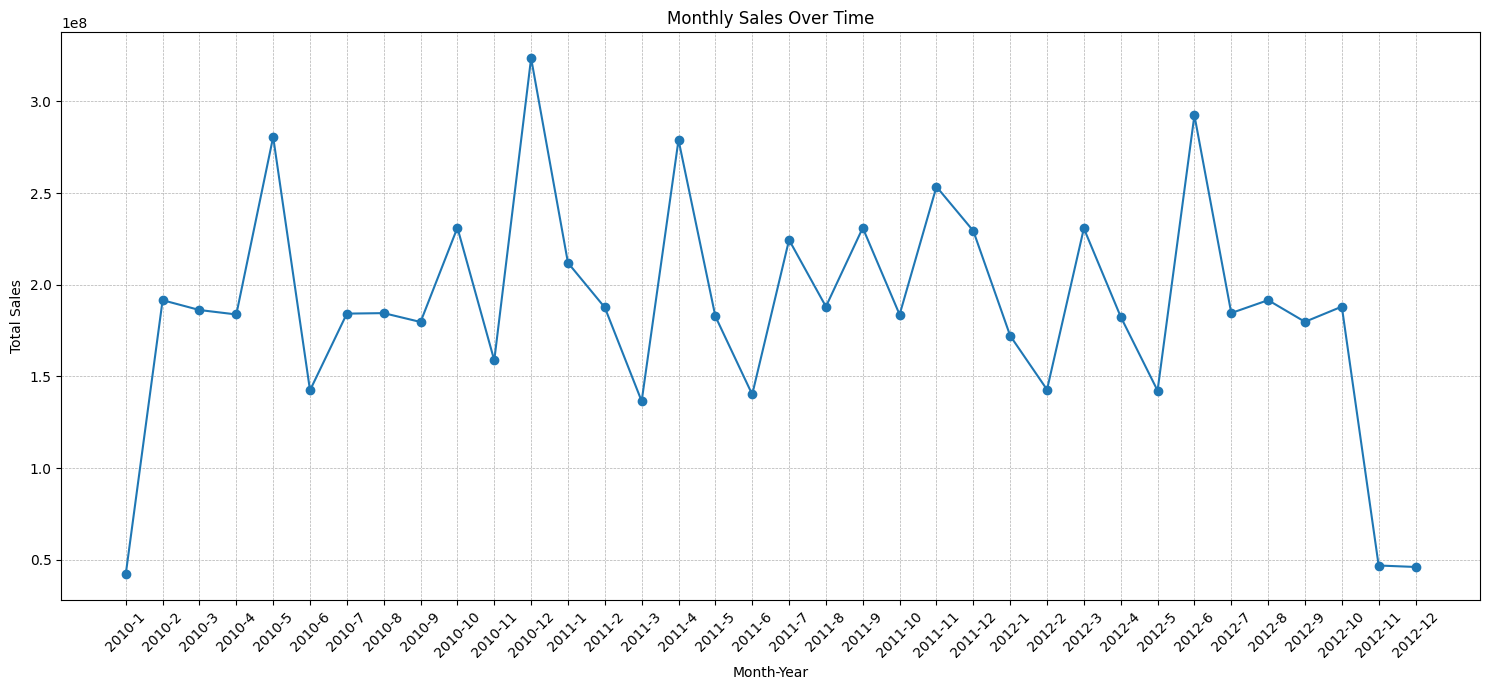

In [ ]:
# Plotting monthly sales
plt.figure(figsize=(15, 7))
plt.plot(monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str), monthly_sales['Weekly_Sales'], marker='o', linestyle='-')
plt.xticks(rotation=45)
plt.xlabel('Month-Year')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Over Time')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Function to assign semester based on month
def assign_semester(month):
    return 'S1' if month <= 6 else 'S2'

# Assigning semester to each row in the dataframe
walmart_data['Semester'] = walmart_data['Month'].apply(assign_semester)

# Grouping by year and semester to get total sales for each semester
semester_sales = walmart_data.groupby(['Year', 'Semester'])['Weekly_Sales'].sum().reset_index()


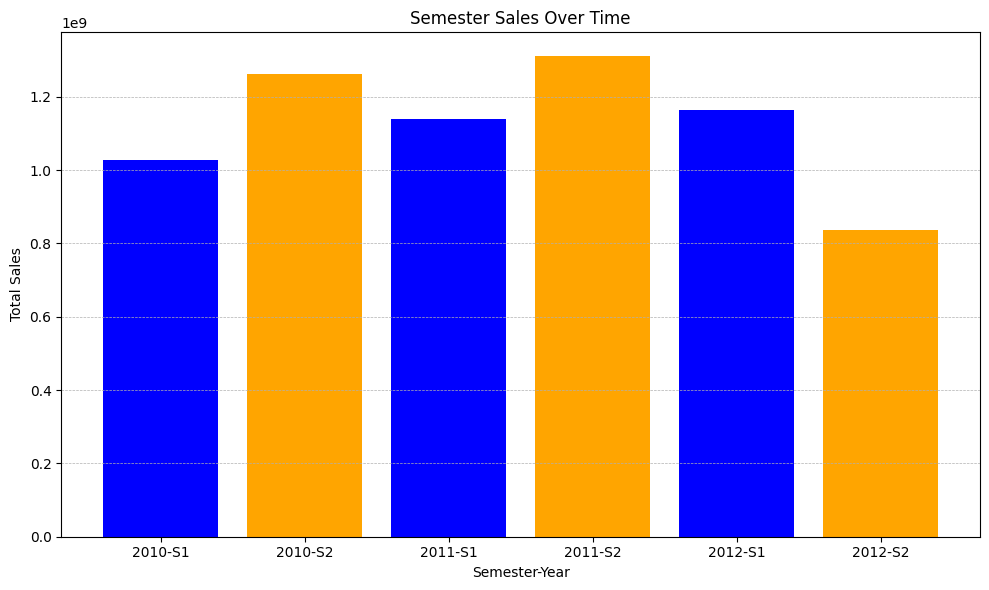

In [ ]:
# Plotting semester sales
plt.figure(figsize=(10, 6))
plt.bar(semester_sales['Year'].astype(str) + '-' + semester_sales['Semester'], semester_sales['Weekly_Sales'], color=['blue', 'orange', 'blue', 'orange', 'blue', 'orange'])
plt.xlabel('Semester-Year')
plt.ylabel('Total Sales')
plt.title('Semester Sales Over Time')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Filtering data for Store 1
store1_data = walmart_data[walmart_data['Store'] == 1].copy()

# Creating a new variable 'DayNum' representing the number of days since the start date (5 Feb 2010)
store1_data['DayNum'] = (store1_data['Date'] - store1_data['Date'].min()).dt.days + 1

store1_data[['Date', 'DayNum']].head()

,Date,DayNum
0,2010-05-02,113
1,2010-12-02,327
2,2010-02-19,41
3,2010-02-26,48
4,2010-05-03,114


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Features and target variable
X = store1_data[['DayNum', 'CPI', 'Unemployment', 'Fuel_Price']]
y = store1_data['Weekly_Sales']


In [ ]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Creating a linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

In [ ]:
# Predicting on the test set
y_pred = lr.predict(X_test)

In [ ]:
# Calculating RMSE and R2 score for the model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

rmse, r2

(155138.0893874215, 0.004935171873408417)

In [ ]:
# Extracting feature coefficients and intercept
coefficients = lr.coef_
intercept = lr.intercept_

feature_names = X.columns
coeff_dict = dict(zip(feature_names, coefficients))

coeff_dict, intercept

({'DayNum': 112.41964510714956,
  'CPI': 13251.046644113605,
  'Unemployment': 90961.21328096454,
  'Fuel_Price': -96594.94918596529},
 -1760772.5557538243)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso

# Initializing models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
    "Ridge": Ridge(alpha=1.0),
    "Lasso": Lasso(alpha=1.0)
}

In [ ]:
# Dictionary to store RMSE for each model
rmse_results = {}

# Training each model and computing RMSE
for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    rmse_results[name] = mean_squared_error(y_test, predictions, squared=False)

# Sorting the results based on RMSE
sorted_rmse_results = dict(sorted(rmse_results.items(), key=lambda item: item[1]))

sorted_rmse_results

{'Random Forest': 141312.88102814456,
 'Linear Regression': 155138.0893874215,
 'Lasso': 155138.33435566915,
 'Ridge': 155270.4460189152,
 'Gradient Boosting': 165162.84754133015,
 'Decision Tree': 206302.4432660151}